In [2]:
import numpy as np 
import pandas as pd 
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from IPython.display import clear_output

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import KFold

import keras

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from tensorflow.keras.layers import BatchNormalization
import os
print(os.listdir("test"))

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.datasets import make_classification
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


# HYPERPARAMETRERS AND DIRECTORIES

In [3]:
IMG_HEIGHT = 48
IMG_WIDTH = 48
BATCH_SIZE = 8
EPOCHS = 200
NUM_CLASSES = 7
EARLY_STOPPING_CRITERIA=3
CLASS_LABELS  = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

# Extracting images from directory

In [5]:
data_path = 'test'
data_dir_list = os.listdir(data_path)

num_epoch=10

img_data_list=[]


for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(IMG_HEIGHT,IMG_WIDTH))
        img_data_list.append(input_img_resize)
        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

Loaded the images of dataset-angry

Loaded the images of dataset-disgusted

Loaded the images of dataset-fearful

Loaded the images of dataset-happy

Loaded the images of dataset-neutral

Loaded the images of dataset-sad

Loaded the images of dataset-surprised



(7178, 48, 48, 3)

# Putting label in data

In [6]:
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:3994]=0 #103
labels[3995:8108]=1 #103
labels[8109:12321]=2 #103
labels[12322:16402]=3 #103

def getLabel(id):
    return ['angry','happy','neutral','sad'][id]

# Splitting train test

In [7]:
Y = np_utils.to_categorical(labels, NUM_CLASSES)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
x_test=X_test

In [10]:
Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

# Creating Model

In [3]:
def create_model():
    input_shape=(48,48,3)

    model = Sequential()
    model.add(Conv2D(36, (5, 5), input_shape=input_shape, padding='same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))

    model.add(Conv2D(64, (5, 5), padding='same', activation = 'relu'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))

    model.add(Conv2D(128, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))

    model.add(Flatten())
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.3))
    model.add(Dense(4, activation = 'softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
    
    return model

In [ ]:
input = Input(shape=(48, 48, 1))
cnn1 = Conv2D(36, kernel_size=3, activation='relu')(input)
cnn1 = MaxPool2D(pool_size=3, strides=2)(cnn1)
cnn2 = Conv2D(64, kernel_size=3, activation='relu')(cnn1)
cnn2 = MaxPool2D(pool_size=3, strides=2)(cnn2)
cnn3 = Conv2D(128, kernel_size=3, activation='relu')(cnn2)
cnn3 = MaxPool2D(pool_size=3, strides=2)(cnn3)
dense = Flatten()(cnn3)
dense = Dropout(0.3)(dense)
dense = Dense(256, activation='relu')(dense)
output = Dense(7, activation='softmax', name='race', kernel_regularizer=l1(1))(dense)
emotion_model = Model(input, output)
emotion_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [4]:
model_custom = create_model()
model_custom.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 36)        2736      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 36)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        57664     
                                                                 
 activation (Activation)     (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         7

# Conduct k-Fold Cross-Validation

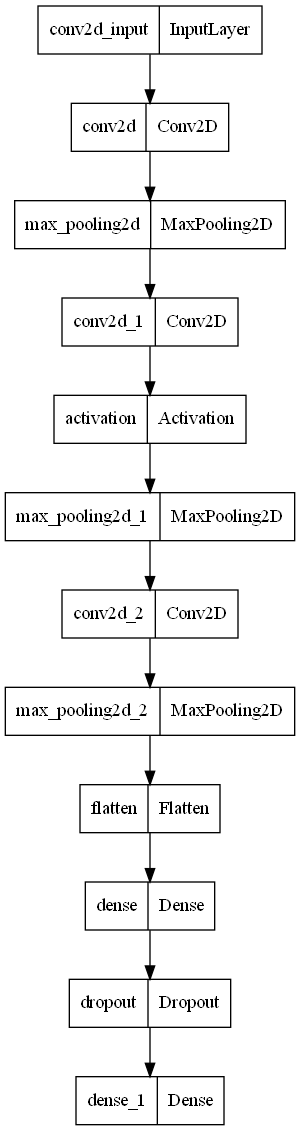

In [6]:
from keras.utils import plot_model
plot_model(model_custom, to_file='model.png')

In [7]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [9]:
kf = KFold(n_splits=5, shuffle=False)

# Training Model

In [12]:
result = []
scores_loss = []
scores_acc = []
k_no = 0
for train_index, test_index in kf.split(x):
    X_Train_ = x[train_index]
    Y_Train = y[train_index]
    X_Test_ = x[test_index]
    Y_Test = y[test_index]

    file_path = 'weights_best_'+str(k_no)+".hdf5"
    checkpoint = ModelCheckpoint(file_path, monitor='loss', verbose=0, save_best_only=True, mode='min')
    early = EarlyStopping(monitor="loss", mode="min", patience=8)

    callbacks_list = [checkpoint, early]

    model = create_model()
    with tf.device("/device:GPU:0"):
        hist=model.fit(X_Train_, Y_Train, batch_size=8, epochs=200, validation_data=(X_Test_, Y_Test), verbose=1)
    model.save_weights(file_path)
    result.append(model.predict(X_Test_))
    score = model.evaluate(X_Test_,Y_Test, verbose=0)
    scores_loss.append(score[0])
    scores_acc.append(score[1])    
    k_no+=1

Epoch 1/200
1651/1651 [==============================] - 13s 5ms/step - loss: 1.3848 - accuracy: 0.2672 - val_loss: 1.3822 - val_accuracy: 0.2626
Epoch 2/200
1651/1651 [==============================] - 7s 4ms/step - loss: 1.3648 - accuracy: 0.3078 - val_loss: 1.3835 - val_accuracy: 0.2645
Epoch 3/200
1651/1651 [==============================] - 8s 5ms/step - loss: 1.3130 - accuracy: 0.3661 - val_loss: 1.2463 - val_accuracy: 0.4159
Epoch 4/200
1651/1651 [==============================] - 7s 4ms/step - loss: 1.1865 - accuracy: 0.4599 - val_loss: 1.1639 - val_accuracy: 0.4829
Epoch 5/200
1651/1651 [==============================] - 8s 5ms/step - loss: 1.1273 - accuracy: 0.4968 - val_loss: 1.1514 - val_accuracy: 0.4899
Epoch 6/200
1651/1651 [==============================] - 8s 5ms/step - loss: 1.0755 - accuracy: 0.5336 - val_loss: 1.1588 - val_accuracy: 0.4917
Epoch 7/200
1651/1651 [==============================] - 8s 5ms/step - loss: 1.0294 - accuracy: 0.5542 - val_loss: 1.1332 - val_a

In [13]:
print(scores_acc,scores_loss)

[0.5104513764381409, 0.49591031670570374, 0.45804300904273987, 0.4809090793132782, 0.5145454406738281] [6.26976203918457, 7.06871223449707, 8.47414779663086, 8.93851375579834, 6.607554912567139]


# Taking model with lowest Loss

In [14]:
value_min = min(scores_loss)
value_index = scores_loss.index(value_min)
print(value_index)

0


In [15]:
model.load_weights("weights_best_"+str(value_index)+".hdf5")

In [16]:
best_model = model

# Evaluating model

In [17]:
score = best_model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]
print (test_image.shape)

print(best_model.predict(test_image))
print(np.argmax(best_model.predict(test_image),axis=1))
print(y_test[0:1])

#predict
pred = best_model.predict(X_test)

Test Loss: 1.351326584815979
Test accuracy: 0.8863980770111084
(1, 48, 48, 3)
1/1 [==============================] - 0s 68ms/step
[[0.00000e+00 1.00000e+00 1.43424e-35 0.00000e+00]]
1/1 [==============================] - 0s 17ms/step
[1]
[[0. 1. 0. 0.]]
104/104 [==============================] - 0s 2ms/step


# Visualizing Train,Test--->Accuracy,Loss

<Figure size 432x288 with 0 Axes>

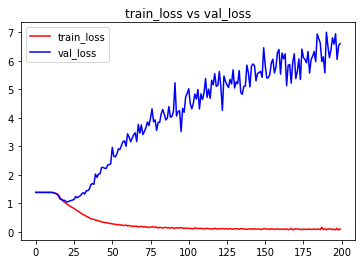

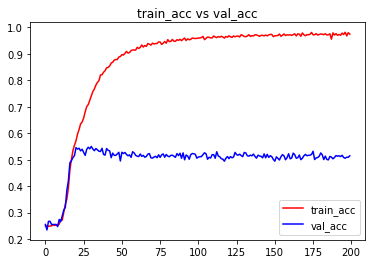

<Figure size 432x288 with 0 Axes>

In [18]:
# visualizing losses and accuracy
%matplotlib inline

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

In [19]:
# Model Save
best_model.save_weights('model_weights2.h5')
best_model.save('model_keras2.h5')

# Confusion Matrix

In [20]:
results = np.argmax(best_model.predict(X_test),axis=1)
cm = confusion_matrix(np.where(y_test == 1)[1], results)

104/104 [==============================] - 0s 4ms/step


In [21]:
#Transform to df for easier plotting
cm_df = pd.DataFrame(cm, index = CLASS_LABELS,
                     columns = CLASS_LABELS
                    )

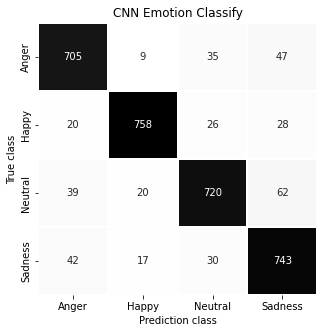

In [22]:
plt.figure(figsize = (5,5))
sns.heatmap(cm_df, annot = True,cmap='Greys',cbar=False,linewidth=2,fmt='d')
plt.title('CNN Emotion Classify')
plt.ylabel('True class')
plt.xlabel('Prediction class')
plt.show()

# Classification Report

In [23]:
print(classification_report(np.where(y_test == 1)[1], results))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       796
           1       0.94      0.91      0.93       832
           2       0.89      0.86      0.87       841
           3       0.84      0.89      0.87       832

    accuracy                           0.89      3301
   macro avg       0.89      0.89      0.89      3301
weighted avg       0.89      0.89      0.89      3301



# ROC Curve

ROC AUC score: 0.9634255061127166


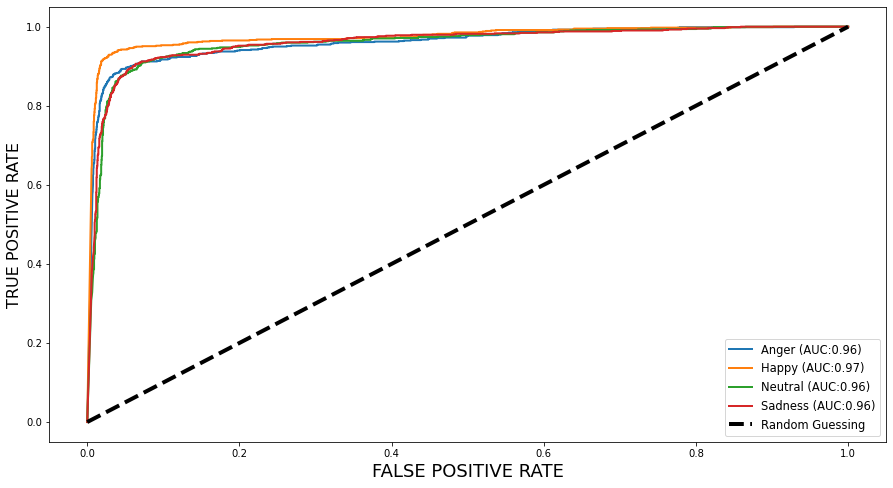

In [25]:
fig, c_ax = plt.subplots(1,1, figsize = (15,8))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    for (idx, c_label) in enumerate(CLASS_LABELS):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr,lw=2, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'black',linestyle='dashed', lw=4, label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

print('ROC AUC score:',multiclass_roc_auc_score(y_test,pred , average = "micro"))
plt.xlabel('FALSE POSITIVE RATE', fontsize=18)
plt.ylabel('TRUE POSITIVE RATE', fontsize=16)
plt.legend(fontsize = 11.5)
plt.show()

In [26]:
print("ROC-AUC Score  = " ,roc_auc_score(y_test , pred))

ROC-AUC Score  =  0.9636396201279089
